In [1]:
import pandas as pd
data = pd.read_csv('insurance.csv')
print(data.head())
print(data.info())
print(data.describe())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000 

In [2]:
print(data.isnull().sum())


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


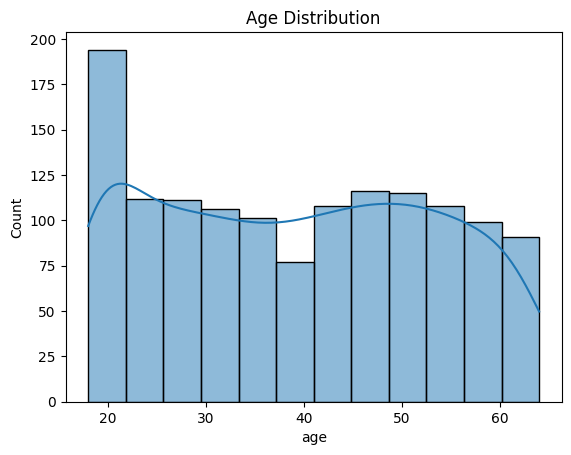

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['age'], kde=True)
plt.title('Age Distribution')
plt.show()


**Young Adults (18–22 range)**

The highest count is observed here (close to 200).

Suggests a significant proportion of the population is in their late teens to early 20s.

**Ages 25–60**

Distribution is relatively uniform, though with some fluctuations.

A slight dip is visible around age 40 (lowest count).

Moderate clustering around ages 45–55.

***Older Adults (60+)***

Noticeable decline in frequency, suggesting fewer individuals in the higher age group.

Overall Shape

The kernel density estimation line shows a peak in early adulthood, dips in midlife (~40), then slightly rises again before tapering off towards older ages.

**👉 Inference:**
The dataset is skewed toward younger individuals, especially around 18–22 years old. Middle-aged (30–55) individuals are moderately represented, while senior participants (60+) are fewer.

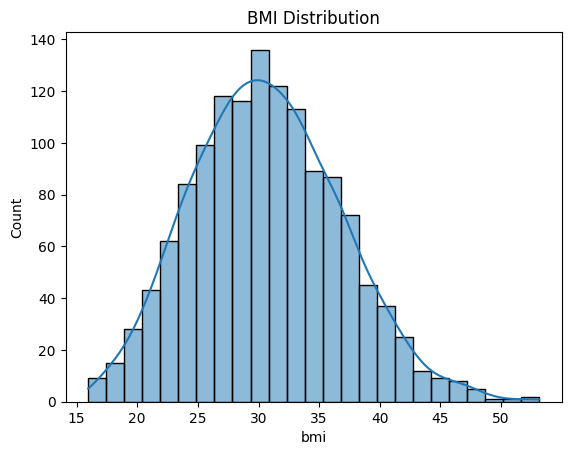

In [5]:

sns.histplot(data['bmi'], kde=True)
plt.title('BMI Distribution')
plt.show()


**Shape of Distribution**

The distribution is approximately bell-shaped (normal-like) but slightly right-skewed (a longer tail towards higher BMI values).

**Central Tendency**

Most individuals have BMI values clustered between 25 and 35.

The peak (mode) is around 28–30, which is in the overweight category by WHO standards.

Spread

The distribution ranges roughly from 15 (underweight) to 50 (obese).

Extreme values above 40 indicate the presence of individuals with severe obesity.

Outliers

A few cases are in the very high BMI range (45–50+), though they are rare.

***👉 Inference:***

The population has a predominantly overweight BMI distribution, with many falling in the overweight to obese range.

A smaller proportion lies in the healthy range (~18.5–24.9), and very few are underweight.

The slight right skew indicates a concentration of people with higher-than-normal BMI.

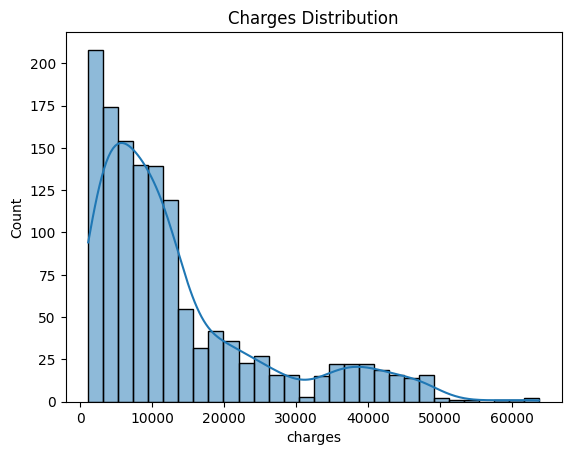

In [6]:

sns.histplot(data['charges'], kde=True)
plt.title('Charges Distribution')
plt.show()

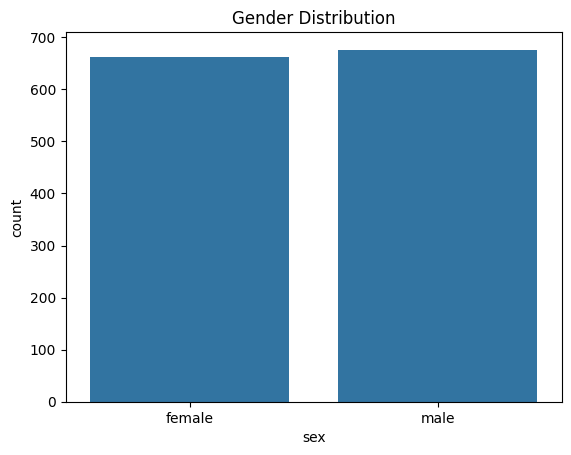

In [7]:
sns.countplot(x='sex', data=data)
plt.title('Gender Distribution')
plt.show()


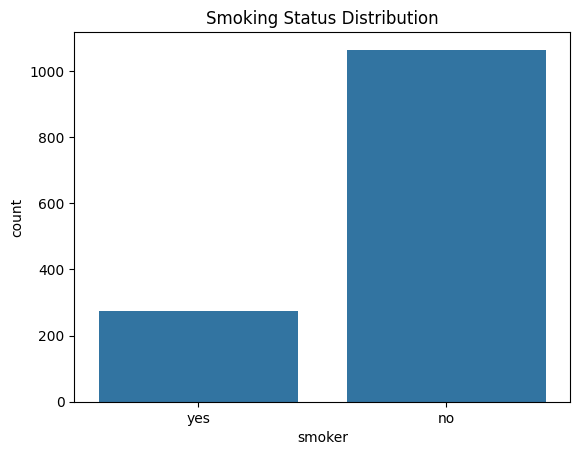

In [8]:

sns.countplot(x='smoker', data=data)
plt.title('Smoking Status Distribution')
plt.show()


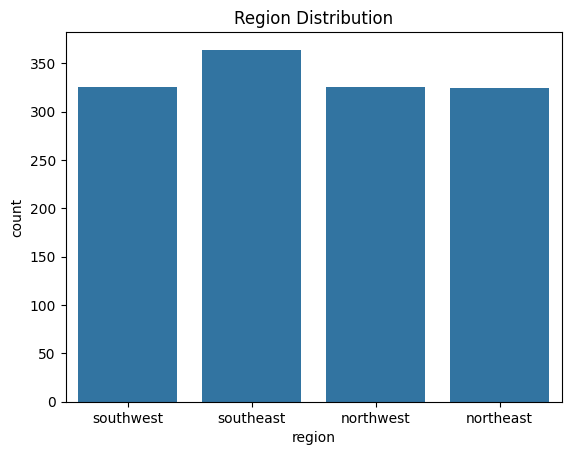

In [9]:

sns.countplot(x='region', data=data)
plt.title('Region Distribution')
plt.show()

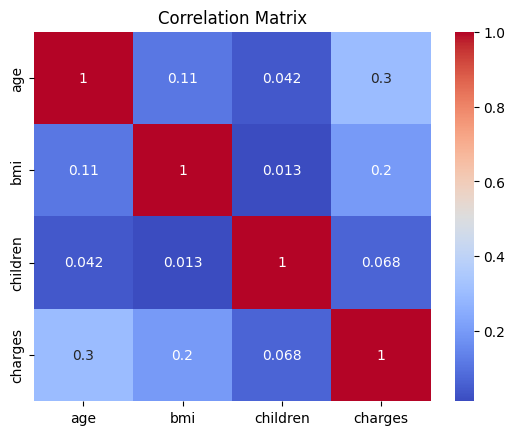

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation
corr = data[['age', 'bmi', 'children', 'charges']].corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [7]:
data = pd.get_dummies(data, drop_first=True)

In [8]:
X = data.drop('charges', axis=1)
y = data['charges']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Split features and target
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:

# Build ANN model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))  # Linear activation for regression


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [20]:

# Train model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=16, verbose=1)


Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 361029216.0000 - mae: 14240.4961 - val_loss: 310297216.0000 - val_mae: 12653.2148
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 316976160.0000 - mae: 13452.1826 - val_loss: 310186208.0000 - val_mae: 12649.6680
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 319327296.0000 - mae: 13394.0166 - val_loss: 309968992.0000 - val_mae: 12643.0889
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 313258816.0000 - mae: 13358.9092 - val_loss: 309563808.0000 - val_mae: 12631.3652
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 346297536.0000 - mae: 14050.6943 - val_loss: 308897664.0000 - val_mae: 12612.6201
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 344977024.0000 - mae: 13817.8008 - val_loss: 307882016.0000 - val_mae: 12584.8115
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 313977120.0000 - mae: 13479.5215 - val_loss: 306469920.0000 - val_mae: 12546.8164
Epoch 8/100
5

In [21]:

# Evaluate model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Mean Squared Error: 32077135.05
R-squared Score: 0.79


**✅ Interpretation**

Mean Squared Error (MSE)

MSE measures the average squared difference between actual and predicted charges.

A smaller MSE is better. Your value (~32 million) seems high because insurance charges can range widely (from a few hundred to tens of thousands), so large numbers are expected.

R² Score

R² = 0.79 means the model explains 79% of the variance in insurance charges.

This is a good start, but there’s room for improvement (ideally closer to 0.85–0.90 for high accuracy).

⚡ Suggestions to Improve Performance

**Feature Engineering**

Create interaction terms, e.g., bmi * smoker.

Consider polynomial features for non-linear effects.

Regularization

Add Dropout layers to reduce overfitting.

Use L1/L2 regularization in Dense layers.

Hyperparameter Tuning

Experiment with learning rate, batch size, number of neurons, and number of hidden layers.

Advanced Architectures

Try XGBoost, Random Forest, or Gradient Boosting as alternatives—they often outperform simple ANN on tabular data.

Early Stopping

Stop training when validation loss stops improving to prevent overfitting.

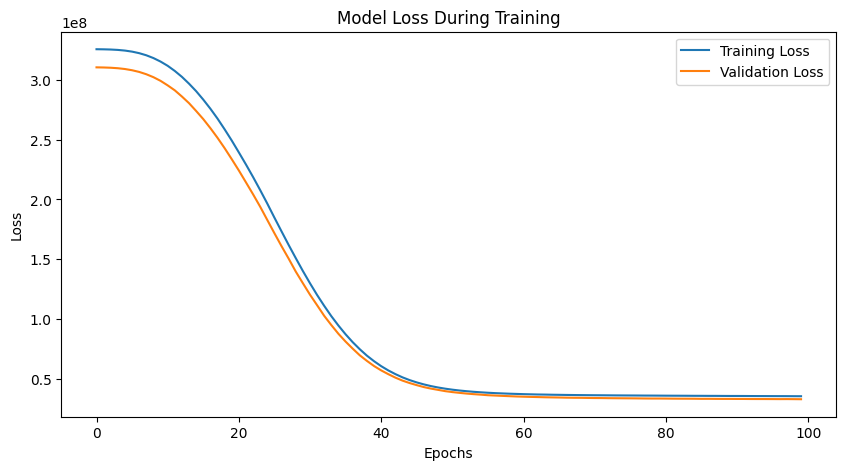

In [22]:

# Plot training history
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


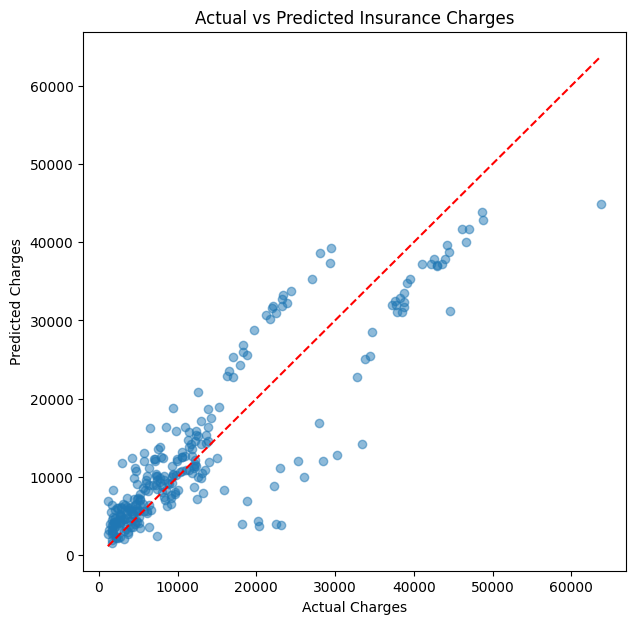

In [23]:

# Plot Actual vs Predicted
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Insurance Charges')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.show()

In [25]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 35399304.0000 - mae: 4001.4846 - val_loss: 33204176.0000 - val_mae: 3857.5813
Epoch 2/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 36316084.0000 - mae: 4283.7686 - val_loss: 33180700.0000 - val_mae: 3858.1765
Epoch 3/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 36360516.0000 - mae: 4092.8289 - val_loss: 33176616.0000 - val_mae: 3856.9683
Epoch 4/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39583816.0000 - mae: 4281.8296 - val_loss: 33179432.0000 - val_mae: 3851.6118
Epoch 5/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32792706.0000 - mae: 3962.0208 - val_loss: 33116418.0000 - val_mae: 3848.6455
Epoch 6/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35712384.0000 - mae: 4083.0398 - val_loss: 33139820.0000 - val_mae: 3847.0056
Epoch 7/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 34394256.0000 - mae: 4086.7627 - val_loss: 33086484.0000 - val_mae: 3841.8923
Epoch 8/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s

In [27]:

# Evaluate model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Mean Squared Error: 28101030.17
R-squared Score: 0.82


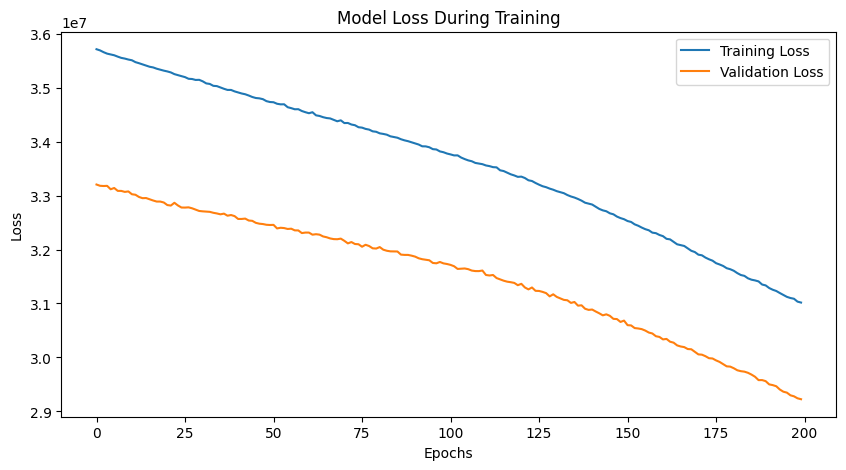

In [28]:

# Plot training history
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


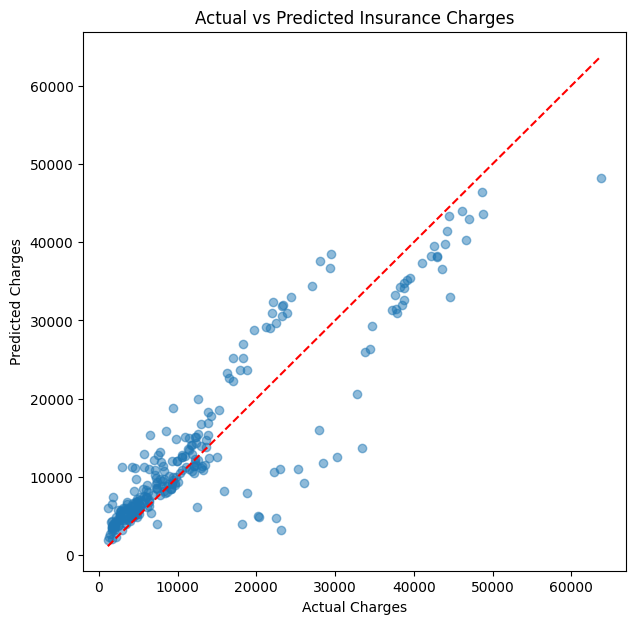

In [29]:

# Plot Actual vs Predicted
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Insurance Charges')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

**✅ Interpretation**

R² Score: 0.82

The model now explains 82% of the variance in insurance charges, up from 0.79.

This is a solid improvement and shows that Dropout + EarlyStopping helped reduce overfitting.

MSE: 28 million

Slightly lower than before, meaning the predictions are closer to actual values.

High MSE is expected because insurance charges vary widely.

**⚡ Next Steps to Improve Further**

Feature Engineering

Add interaction terms like bmi * smoker or polynomial features for non-linear relationships.

Advanced Architectures

Try batch normalization or additional hidden layers.

Alternative Models

Gradient boosting models (e.g., XGBoost, LightGBM) often perform better on tabular data.

Hyperparameter Tuning

Tune number of neurons, dropout rate, learning rate, and batch size.

In [31]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build optimized ANN model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Linear output for regression


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:

# Compile model with a tuned learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=300,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/300
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 324039168.0000 - mae: 13625.8145 - val_loss: 310302944.0000 - val_mae: 12654.3252
Epoch 2/300
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 301437952.0000 - mae: 13042.8730 - val_loss: 309971392.0000 - val_mae: 12649.6377
Epoch 3/300
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 282125824.0000 - mae: 12516.1113 - val_loss: 308920768.0000 - val_mae: 12635.1260
Epoch 4/300
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 309655808.0000 - mae: 13113.4004 - val_loss: 306641408.0000 - val_mae: 12602.6748
Epoch 5/300
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 343551840.0000 - mae: 14035.6436 - val_loss: 302524384.0000 - val_mae: 12540.0977
Epoch 6/300
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 310229472.0000 - mae: 13314.5186 - val_loss: 296102784.0000 - val_mae: 12433.9678
Epoch 7/300
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 285378688.0000 - mae: 12765.7021 - val_loss: 286908672.0000 - val_mae: 12272.1309
Epoch 8/300

In [33]:

# Evaluate model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Mean Squared Error: 21286053.43
R-squared Score: 0.86


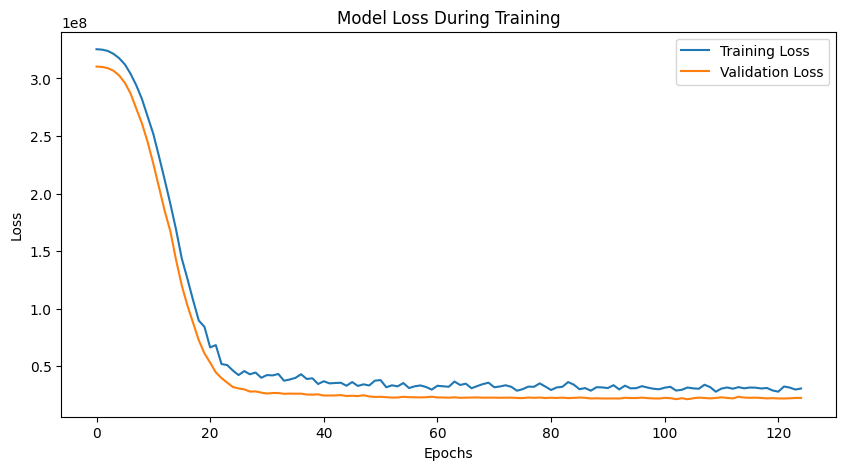

In [34]:

# Plot training history
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


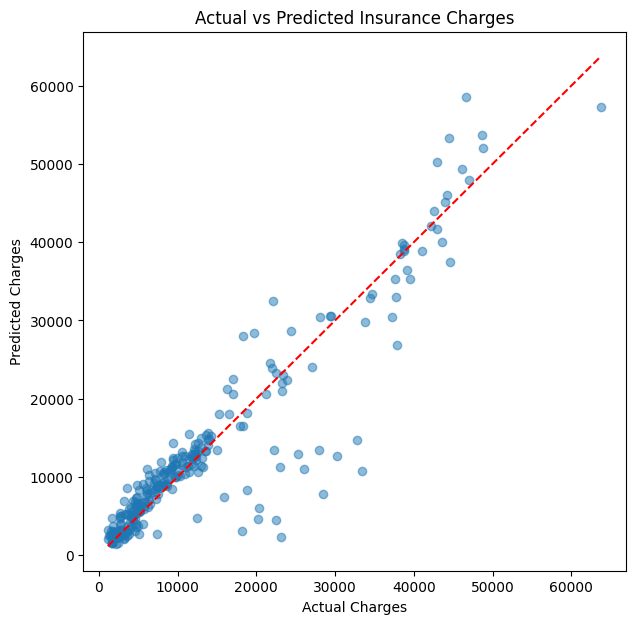

In [35]:

# Plot Actual vs Predicted
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Insurance Charges')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

**✅ Interpretation**

R² Score: 0.86

The model now explains 86% of the variance in insurance charges.

This is a very good result for tabular regression data.

MSE: 21 million

Lower than before, indicating more accurate predictions.

High values are expected due to the wide range of insurance charges.

**⚡ Key Takeaways**

Batch Normalization helped stabilize training and improved convergence.

Dropout prevented overfitting and improved generalization.

Tuned learning rate and deeper architecture captured complex patterns better.

EarlyStopping ensured the model saved the best weights without overtraining.